### Problem Statement

You are a data scientist / AI engineer working on a classification problem to predict the weather type based on various weather-related features. You have been provided with a dataset named **`"weather_classification_data.csv"`**, which includes several parameters affecting weather conditions. The dataset comprises the following columns:

- temperature: The temperature in degrees Celsius.
- humidity: The humidity percentage.
- wind_speed: The wind speed in kilometers per hour.
- precipitation (%): The precipitation percentage.
- cloud_cover: The cloud cover description.
- atmospheric_pressure: The atmospheric pressure in hPa.
- uv_index: The UV index.
- season: The season during which the data was recorded.
- visibility (km): The visibility in kilometers.
- location: The type of location where the data was recorded.
- weather_type: The target variable for classification, indicating the weather type (Rainy, Sunny, Cloudy, Snowy).
  
Your task is to use this dataset to build and evaluate machine learning models to predict the weather type based on the given parameters. You will perform data preprocessing, exploratory data analysis, and model training using Support Vector Machine (SVM) with different kernels.

Dataset credits: Nikhil Narayan (https://www.kaggle.com/datasets/nikhil7280/weather-type-classification)

**Import Necessary Libraries**

# Import Necessary Libraries


In [4]:
# ===== Cell 1: imports =====
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Notebook plotting style
%matplotlib inline
sns.set_theme(context="notebook", style="whitegrid")

# Make pandas show floats more readably
pd.options.display.float_format = "{:.3f}".format

### Task 1: Data Preparation and Exploration

1. Import the data from the `"weather_data.csv"` file and store it in a DataFrame.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to understand its structure.
4. Check for any missing values in the dataset and handle them appropriately.
5. Visualize the distribution of key features using appropriate charts:
    - Visualize `season` using a pie chart.
    - Visualize `temperature, humidity, and wind_speed` using histograms.
    - Visualize `precipitation (%)` using a box plot.

In [6]:
# Step 1: Import the data from the "weather_data.csv" file
filename = "weather_classification_data.csv"   # change path if file not in notebook folder
df = pd.read_csv(filename)
print("Loaded:", filename)

# Step 2: Display the number of rows and columns in the dataset
print("Shape (rows, cols):", df.shape)
print("\nColumns:")
print(df.columns.tolist())

# Step 3: Display the first few rows of the dataset to understand its structure.
display(df.head(6))
print("\nData types:")
print(df.dtypes)

Loaded: weather_classification_data.csv
Shape (rows, cols): (13200, 11)

Columns:
['temperature', 'humidity', 'wind_speed', 'precipitation (%)', 'cloud_cover', 'atmospheric_pressure', 'uv_index', 'season', 'visibility (km)', 'location', 'weather_type']


,temperature,humidity,wind_speed,precipitation (%),cloud_cover,atmospheric_pressure,uv_index,season,visibility (km),location,weather_type
0,14,73,9.500,82,partly cloudy,"1,010.820",2,Winter,3.500,inland,Rainy
1,39,96,8.500,71,partly cloudy,"1,011.430",7,Spring,10.000,inland,Cloudy
2,30,64,7.000,16,clear,"1,018.720",5,Spring,5.500,mountain,Sunny
3,38,83,1.500,82,clear,"1,026.250",7,Spring,1.000,coastal,Sunny
4,27,74,17.000,66,overcast,990.670,1,Winter,2.500,mountain,Rainy
5,32,55,3.500,26,overcast,"1,010.030",2,Summer,5.000,inland,Cloudy



Data types:
temperature               int64
humidity                  int64
wind_speed              float64
precipitation (%)         int64
cloud_cover              object
atmospheric_pressure    float64
uv_index                  int64
season                   object
visibility (km)         float64
location                 object
weather_type             object
dtype: object


In [7]:
# ===== Cell 5: numeric summary =====
display(df.describe().T)   # count, mean, std, min, quartiles, max

,count,mean,std,min,25%,50%,75%,max
temperature,"13,200.000",19.128,17.386,-25.000,4.000,21.000,31.000,109.000
humidity,"13,200.000",68.711,20.194,20.000,57.000,70.000,84.000,109.000
wind_speed,"13,200.000",9.832,6.909,0.000,5.000,9.000,13.500,48.500
precipitation (%),"13,200.000",53.644,31.947,0.000,19.000,58.000,82.000,109.000
atmospheric_pressure,"13,200.000","1,005.828",37.200,800.120,994.800,"1,007.650","1,016.773","1,199.210"
uv_index,"13,200.000",4.006,3.857,0.000,1.000,3.000,7.000,14.000
visibility (km),"13,200.000",5.463,3.371,0.000,3.000,5.000,7.500,20.000


In [10]:
# == missing values and duplicates ==
missing = df.isnull().sum()
print("Missing values per column:\n", missing[missing > 0] if missing.any() else "No missing values found")

dupes = df.duplicated().sum()
print("\nNumber of duplicate rows:", dupes)

Missing values per column:
 No missing values found

Number of duplicate rows: 0


In [11]:
## ===== Cell 7: categorical distributions =====
# Replace 'season' and 'weather_type' with exact names if they differ (check df.columns)
for col in ["season", "weather_type"]:
    if col in df.columns:
        print(f"\nValue counts for {col}:")
        display(df[col].value_counts())
    else:
        print(f"\nColumn '{col}' not found in DataFrame; available columns: {df.columns.tolist()}")


Value counts for season:


season
Winter    5610
Spring    2598
Autumn    2500
Summer    2492
Name: count, dtype: int64


Value counts for weather_type:


weather_type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64

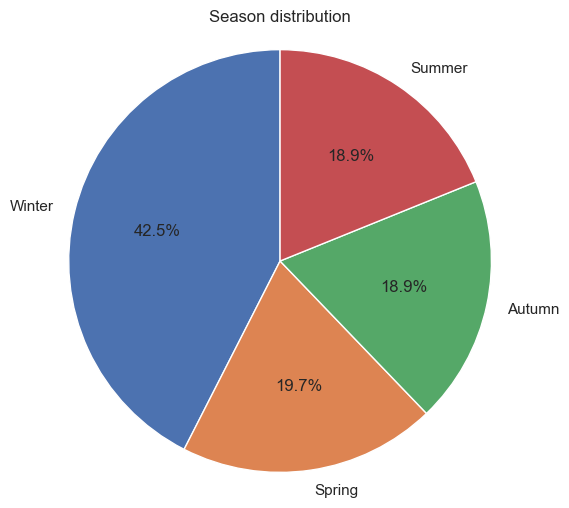

In [12]:
# B: Pie chart for season distribution
plt.figure(figsize=(6,6))
counts = df['season'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Season distribution")
plt.axis('equal')
plt.show()

In [3]:
# Step 4: Visualize the distribution of key features


# Visualize season using a pie chart


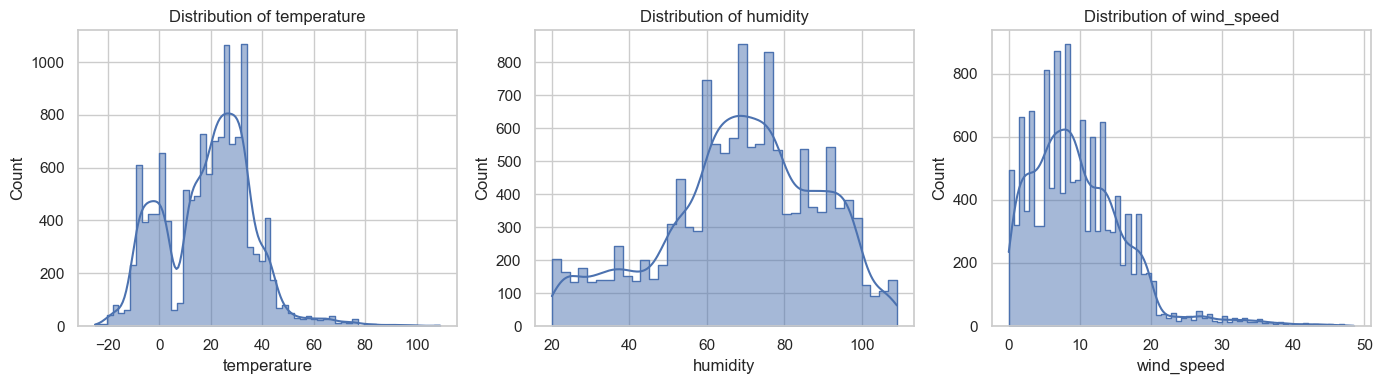

In [13]:
# Visualize temperature, humidity, and wind_speed using histograms

numeric_features = ['temperature','humidity','wind_speed']
plt.figure(figsize=(14,4))

for i, feat in enumerate(numeric_features, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[feat].dropna(), kde=True, element='step')
    plt.title(f'Distribution of {feat}')
    plt.xlabel(feat)
plt.tight_layout()
plt.show()

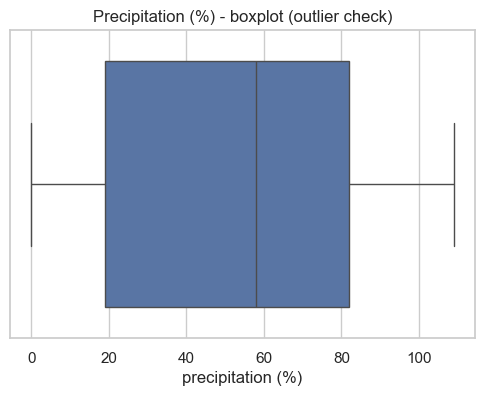

In [14]:
# Visualize precipitation (%) using a box plot
plt.figure(figsize=(6,4))
sns.boxplot(x=df['precipitation (%)'].dropna())
plt.title('Precipitation (%) - boxplot (outlier check)')
plt.show()

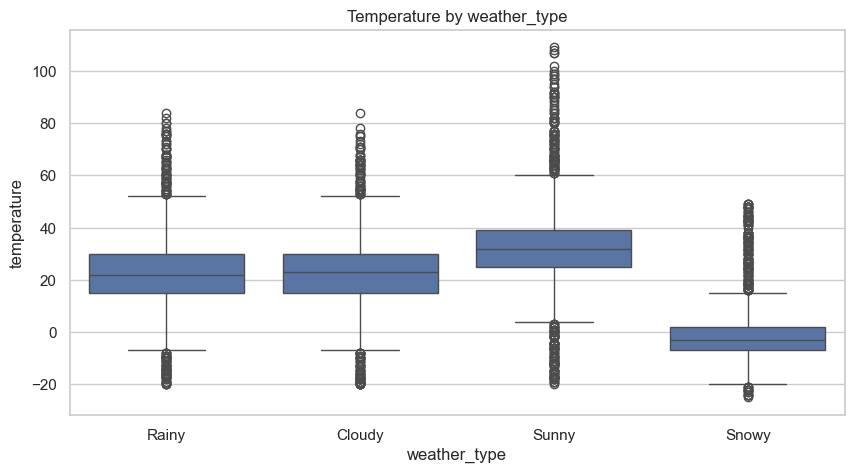

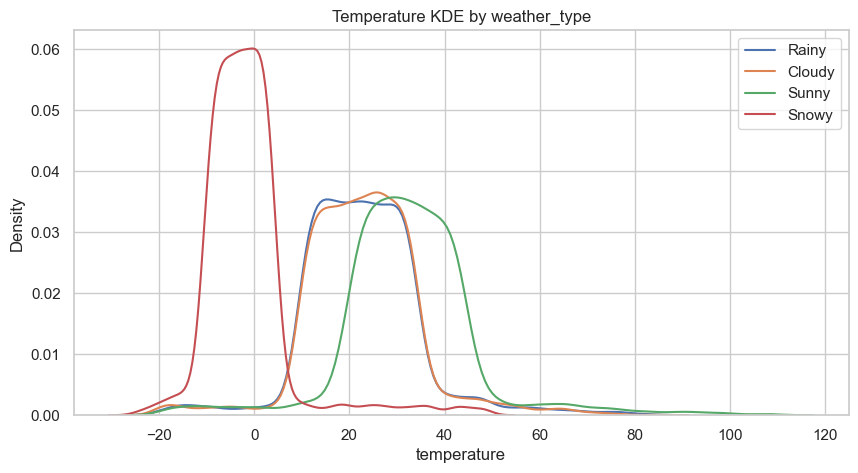

In [15]:
#Per class distribution 
plt.figure(figsize=(10,5))
sns.boxplot(x='weather_type', y='temperature', data=df)
plt.title('Temperature by weather_type')
plt.show()

# And KDE / hist overlays:
plt.figure(figsize=(10,5))
for w in df['weather_type'].unique():
    sns.kdeplot(df.loc[df['weather_type']==w,'temperature'], label=w)
plt.title('Temperature KDE by weather_type')
plt.legend()
plt.show()

### Task 2: Data Transformation

1. Encode cloud_cover, location and season using one-hot encoding.
2. Scale the numerical features (temperature, humidity, wind_speed, precipitation (%), atmospheric_pressure, uv_index, visibility (km)) using StandardScaler.
3. Display the first few rows of the updated dataset.

In [16]:
# Step 1: Encode cloud_cover, location and season using one-hot encoding.
from sklearn.preprocessing import StandardScaler    # Making a copy so original df is safe 

df_transformed = df.copy ()
# one hot encode categorical columns 
categorical_cols = ['cloud_cover', 'location', 'season']
df_transformed = pd.get_dummies(df_transformed,columns = categorical_cols,drop_first = True)

print("After one-hot encoding :")
print(df_transformed.head())
print("\nShape:",df_transformed.shape)



After one-hot encoding :
   temperature  humidity  wind_speed  precipitation (%)  atmospheric_pressure  \
0           14        73       9.500                 82             1,010.820   
1           39        96       8.500                 71             1,011.430   
2           30        64       7.000                 16             1,018.720   
3           38        83       1.500                 82             1,026.250   
4           27        74      17.000                 66               990.670   

   uv_index  visibility (km) weather_type  cloud_cover_cloudy  \
0         2            3.500        Rainy               False   
1         7           10.000       Cloudy               False   
2         5            5.500        Sunny               False   
3         7            1.000        Sunny               False   
4         1            2.500        Rainy               False   

   cloud_cover_overcast  cloud_cover_partly cloudy  location_inland  \
0                 False   

In [18]:
df.columns.tolist()

['temperature',
 'humidity',
 'wind_speed',
 'precipitation (%)',
 'cloud_cover',
 'atmospheric_pressure',
 'uv_index',
 'season',
 'visibility (km)',
 'location',
 'weather_type']

In [19]:
# Step 2: Scale the numerical features
num_features = ['temperature', 'humidity', 'wind_speed', 
                'precipitation (%)', 'atmospheric_pressure', 
                'uv_index', 'visibility (km)']
scaler = StandardScaler()
df_transformed[num_features] = scaler.fit_transform(df_transformed[num_features])

print("\nAfter scaling numerical features:")
print(df_transformed[num_features].head())


After scaling numerical features:
   temperature  humidity  wind_speed  precipitation (%)  atmospheric_pressure  \
0       -0.295     0.212      -0.048              0.888                 0.134   
1        1.143     1.351      -0.193              0.543                 0.151   
2        0.625    -0.233      -0.410             -1.178                 0.347   
3        1.086     0.708      -1.206              0.888                 0.549   
4        0.453     0.262       1.038              0.387                -0.407   

   uv_index  visibility (km)  
0    -0.520           -0.582  
1     0.776            1.346  
2     0.258            0.011  
3     0.776           -1.324  
4    -0.779           -0.879  


In [ ]:
print("\nFinal dataset shape:", df_transformed.shape)
print("Columns:\n", df_transformed.columns.tolist())

In [27]:
# Step3: Display the first few rows of the updated dataset.
print("\nFinal dataset shape:",df_transformed.shape)
print("columns:\n",df_transformed.columns.tolist())


Final dataset shape: (13200, 16)
columns:
 ['temperature', 'humidity', 'wind_speed', 'precipitation (%)', 'atmospheric_pressure', 'uv_index', 'visibility (km)', 'weather_type', 'cloud_cover_cloudy', 'cloud_cover_overcast', 'cloud_cover_partly cloudy', 'location_inland', 'location_mountain', 'season_Spring', 'season_Summer', 'season_Winter']


### Task 3: Model Training Using SVM with Linear Kernel

1. Select the features and the target variable for modeling.
2. Split the data into training and test sets with a test size of 30%.
3. Initialize and train an SVM model with a linear kernel using the training data.
4. Print the model's accuracy score on test data.
5. Evaluate the model using a classification report and confusion matrix.

In [37]:
# ---- cell: imports for Task 3 ----
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [38]:
# 1) Prepare X and y -------------------------------------
# df_transformed should be the dataframe from Task 2 (one-hot + scaled numerical)
# Confirm the name exists:
try:
    df_transformed
except NameError:
    raise NameError("df_transformed not found — run Task 2 cell(s) first and set df_transformed.")

In [39]:
# Step 1: Select features and target variable
target_col = 'weather_type'
# Features: drop the target column
X = df_transformed.drop(columns=[target_col]).copy()
y_raw = df_transformed[target_col].copy()

print("Feature matrix shape:", X.shape)
print("Target value counts:\n", y_raw.value_counts())
#  Encode target labels (string -> int)
le = LabelEncoder()
y = le.fit_transform(y_raw)   # e.g. ['Cloudy','Rainy',...] -> [0,1,...]
print("Classes (label encoder):", list(le.classes_))

# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)
print("Train/test shapes:", X_train.shape, X_test.shape)


Feature matrix shape: (13200, 15)
Target value counts:
 weather_type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64
Classes (label encoder): ['Cloudy', 'Rainy', 'Snowy', 'Sunny']
Train/test shapes: (9240, 15) (3960, 15)


In [41]:
# Step 3: Train SVM with linear kernel
model = SVC(kernel = 'linear',random_state=42) 
model.fit(X_train,y_train)
# Step 4: Print accuracy score
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {acc:.4f}\n")

print("Classification report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy on test set: 0.8859

Classification report:
              precision    recall  f1-score   support

      Cloudy       0.86      0.85      0.86       990
       Rainy       0.88      0.88      0.88       990
       Snowy       0.89      0.92      0.91       990
       Sunny       0.91      0.89      0.90       990

    accuracy                           0.89      3960
   macro avg       0.89      0.89      0.89      3960
weighted avg       0.89      0.89      0.89      3960



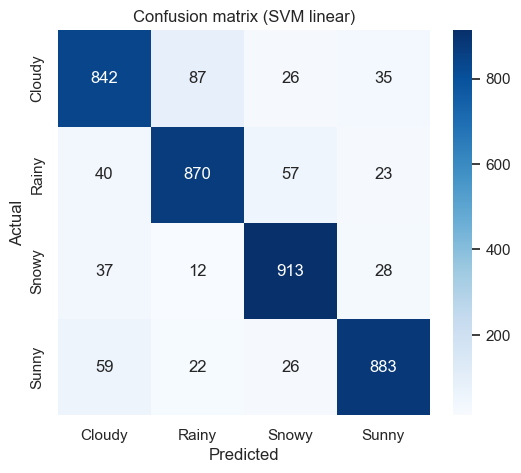

In [42]:
# Confusion matrix + heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix (SVM linear)")
plt.show()

In [11]:
# Step 5: Evaluate the model


#classification report



#confusion matrix


### Task 4: Model Training Using SVM with RBF Kernel

1. Initialize and train an SVM model with an RBF kernel using the training data.
2. Print the model's accuracy score on test data.
3. Evaluate the model using a classification report and confusion matrix.

Classification report (RBF):
              precision    recall  f1-score   support

      Cloudy       0.85      0.91      0.88       990
       Rainy       0.91      0.91      0.91       990
       Snowy       0.95      0.91      0.93       990
       Sunny       0.93      0.90      0.92       990

    accuracy                           0.91      3960
   macro avg       0.91      0.91      0.91      3960
weighted avg       0.91      0.91      0.91      3960

RBF Accuracy on test set: 0.9088



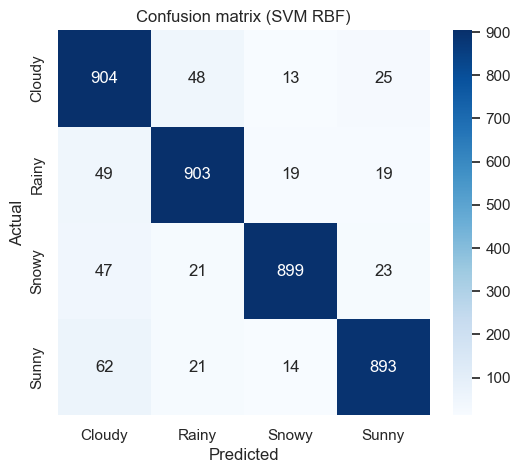

In [43]:
# Step 1: Train SVM with RBF kernel
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix 
import matplotlib.pyplot as plt 
import seaborn as sns 

#X_train, X_test, y_train, y_test already defined from Task 3
rbf_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)  # gamma='scale' is recommended default
rbf_model.fit(X_train, y_train)

y_pred_rbf = rbf_model.predict(X_test)
acc_rbf = accuracy_score(y_test, y_pred_rbf)

print("Classification report (RBF):")
print(classification_report(y_test, y_pred_rbf, target_names=le.classes_))
# Step 2: Print accuracy score
print(f"RBF Accuracy on test set: {acc_rbf:.4f}\n")



# Step 3: Evaluate the model

#classification report



#confusion matrix

cm_rbf = confusion_matrix(y_test, y_pred_rbf)
plt.figure(figsize=(6,5))
sns.heatmap(cm_rbf, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.xlabel("Predicted"); plt.ylabel("Actual"); plt.title("Confusion matrix (SVM RBF)")
plt.show()

In [45]:
#Grid search 
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,0.5,1,5], 'gamma':['scale','auto',0.01,0.1,1], 'kernel':['rbf']}
gs = GridSearchCV(SVC(), param_grid, cv=3, scoring='accuracy', n_jobs=-1)
gs.fit(X_train, y_train)
print("Best params:", gs.best_params_, "best score:", gs.best_score_)
best = gs.best_estimator_
print("Test accuracy with best:", accuracy_score(y_test, best.predict(X_test)))

Best params: {'C': 5, 'gamma': 0.1, 'kernel': 'rbf'} best score: 0.9104978354978354
Test accuracy with best: 0.9141414141414141


### Task 5: Experiment with Hyperparameters in SVM

1. Train an SVM model with an RBF kernel and the following hyperparameters:
    - C=0.5
    - gamma='auto'
    - kernel='rbf'
    - degree=2
      
Learn about these parameters here: [SVC Parameters](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

--------------------------------------------------------------------------------------------------------------------------------------------------------

2. Print the model's accuracy score on test data.
3. Evaluate the model using a classification report and confusion matrix.

Task 5 Accuracy on test set: 0.9053
Classification report (Task 5):
              precision    recall  f1-score   support

      Cloudy       0.84      0.91      0.87       990
       Rainy       0.89      0.92      0.91       990
       Snowy       0.97      0.91      0.94       990
       Sunny       0.93      0.89      0.91       990

    accuracy                           0.91      3960
   macro avg       0.91      0.91      0.91      3960
weighted avg       0.91      0.91      0.91      3960



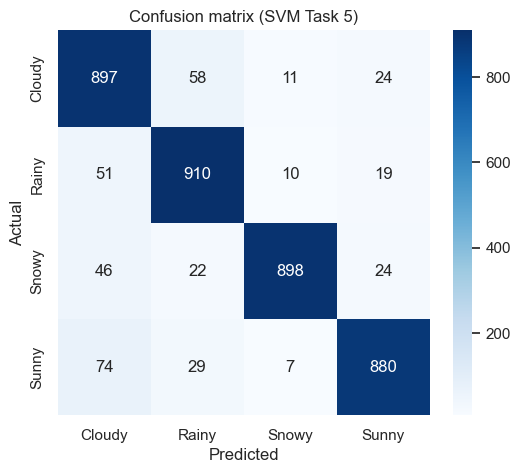

In [46]:
# Step 1: Train the SVM model with specified hyperparameters
model_task5 = SVC(kernel='rbf', C=0.5, gamma='auto', degree=2, random_state=42)
model_task5.fit(X_train, y_train)

# Step 2: Print the model's accuracy score
y_pred_task5 = model_task5.predict(X_test)
acc_task5 = accuracy_score(y_test, y_pred_task5)
print(f"Task 5 Accuracy on test set: {acc_task5:.4f}")

# Step 3: Make predictions on the test set



# Step 4: Evaluate the model using a classification report and confusion matrix

print("Classification report (Task 5):")
print(classification_report(y_test, y_pred_task5, target_names=le.classes_))

cm_task5 = confusion_matrix(y_test, y_pred_task5)
plt.figure(figsize=(6,5))
sns.heatmap(cm_task5, annot=True, fmt='d',
            xticklabels=le.classes_, yticklabels=le.classes_,
            cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix (SVM Task 5)")
plt.show()

#classification report



#confusion matrix



### Task 6: Implementing Sklearn Pipeline

1. Create a pipeline that includes the StandardScaler and the SVM model with an RBF kernel.
2. Train the pipeline using the training data.
3. Evaluate the pipeline using the test data and print the classification report.

In [ ]:
# Task 6: Pipeline with StandardScaler and SVM (RBF)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Create pipeline: scaling then SVM (RBF)
pipeline = Pipeline([
    ('scaler', StandardScaler()),        # scale numerical features
    ('svm', SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42))  # default gamma='scale' is recommended
])

# Fit pipeline on training data
pipeline.fit(X_train, y_train)

# Predict on test set
y_pred_pipe = pipeline.predict(X_test)

# Metrics
acc_pipe = accuracy_score(y_test, y_pred_pipe)
print(f"Pipeline (Scaler + RBF SVM) accuracy on test set: {acc_pipe:.4f}\n")

print("Classification report (pipeline):")
print(classification_report(y_test, y_pred_pipe, target_names=le.classes_))

# Confusion matrix + heatmap
cm_pipe = confusion_matrix(y_test, y_pred_pipe)
plt.figure(figsize=(6,5))
sns.heatmap(cm_pipe, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix (Pipeline: Scaler + SVM RBF)")
plt.show()

In [47]:
#importing necessary libraries 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns



Pipeline (Scaler + RBF SVM) accuracy on test set: 0.9086

Classification report (pipeline):
              precision    recall  f1-score   support

      Cloudy       0.85      0.91      0.88       990
       Rainy       0.90      0.92      0.91       990
       Snowy       0.96      0.91      0.93       990
       Sunny       0.94      0.89      0.92       990

    accuracy                           0.91      3960
   macro avg       0.91      0.91      0.91      3960
weighted avg       0.91      0.91      0.91      3960



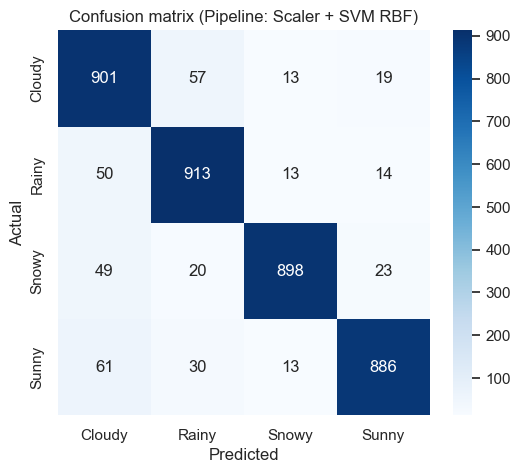

In [48]:
# Create a pipeline with two steps: scaling and SVM with RBF kernel
pipeline = Pipeline([
    ('scaler', StandardScaler()),        # scale numerical features
    ('svm', SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42))  # default gamma='scale' is recommended
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions using the pipeline on the test data
y_pred_pipe = pipeline.predict(X_test)
acc_pipe = accuracy_score(y_test, y_pred_pipe)
print(f"Pipeline (Scaler + RBF SVM) accuracy on test set: {acc_pipe:.4f}\n")
print("Classification report (pipeline):")
print(classification_report(y_test, y_pred_pipe, target_names=le.classes_))
# Print the classification report for the pipeline model


# Print the confusion matrix for the pipeline model
cm_pipe = confusion_matrix(y_test, y_pred_pipe)
plt.figure(figsize=(6,5))
sns.heatmap(cm_pipe, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix (Pipeline: Scaler + SVM RBF)")
plt.show()